# Data Aggregation

This notebook aggregates the data in the raw file into a format we will use for the final project. Please not that not all the raw data will be used for this purpose. We will also not preprocess anything much except for checking whether some data from multiple sources might be duplicates of each other. We will also track which data comes from which dataset incase we will need to perform data processing on each source individually. **The column should not be use as a feature for downstream tasks**.

- label=1 -> real
- label=0 -> fake

In [1]:
import pandas as pd

## Load all raw data into dataframes

In [8]:
df_news_data_fake = pd.read_csv("raw_data/NewsDataSet/Fake.csv")
df_news_data_real = pd.read_csv("raw_data/NewsDataSet/True.csv")

In [3]:
df_misinfo79_fake = pd.read_csv("raw_data/MisInfo79k/DataSet_Misinfo_FAKE.csv")
df_misinfo79_real = pd.read_csv("raw_data/MisInfo79k/DataSet_Misinfo_TRUE.csv")

In [20]:
df_welfake = pd.read_csv("raw_data/WelFake/WELFake_Dataset.csv")

## NewsDataSet

In [9]:
df_news_data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
df_news_data_fake = df_news_data_fake[["text"]]
df_news_data_fake["label"] = 0
df_news_data_fake["source"] = "NewsDataSet"

df_news_data_real = df_news_data_real[["text"]]
df_news_data_real["label"] = 1
df_news_data_real["source"] = "NewsDataSet"

## DataSet Misinfo 79k

In [15]:
df_misinfo79_fake.head()

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...


In [16]:
df_misinfo79_fake = df_misinfo79_fake[["text"]]
df_misinfo79_fake["label"] = 0
df_misinfo79_fake["source"] = "Misinfo79k"

df_misinfo79_real = df_misinfo79_real[["text"]]
df_misinfo79_real["label"] = 1
df_misinfo79_real["source"] = "Misinfo79k"

## WelFake

In [17]:
df_welfake.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [21]:
df_welfake = df_welfake[["text", "label"]]
df_welfake["source"] = "WelFake"

In [22]:
df_welfake.head()

,text,label,source
0,No comment is expected from Barack Obama Membe...,1,WelFake
1,Did they post their votes for Hillary already?,1,WelFake
2,"Now, most of the demonstrators gathered last ...",1,WelFake
3,A dozen politically active pastors came here f...,0,WelFake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,WelFake


## *Combine*

In [28]:
dfs = [df_news_data_fake, df_news_data_real, df_misinfo79_fake, df_misinfo79_real, df_welfake]

main_df = pd.concat(dfs)
main_df = main_df.drop_duplicates(subset="text")
main_df = main_df.reset_index(drop=True)
main_df = main_df.dropna()

In [32]:
main_df.head()

,text,label,source
0,Donald Trump just couldn t wish all Americans ...,0,NewsDataSet
1,House Intelligence Committee Chairman Devin Nu...,0,NewsDataSet
2,"On Friday, it was revealed that former Milwauk...",0,NewsDataSet
3,"On Christmas day, Donald Trump announced that ...",0,NewsDataSet
4,Pope Francis used his annual Christmas Day mes...,0,NewsDataSet


In [31]:
len(main_df)

97340

In [33]:
main_df['word_count'] = main_df['text'].apply(lambda x: len(x.split()))
main_df['char_count'] = main_df['text'].apply(len)

In [36]:
main_df.describe()

,label,word_count,char_count
count,97340.000000,97340.000000,97340.000000
mean,0.602856,462.951377,2806.553298
std,0.489309,549.671312,3282.985534
min,0.000000,0.000000,1.000000
25%,0.000000,147.000000,899.000000
50%,1.000000,358.000000,2170.000000
75%,1.000000,582.000000,3538.000000
max,1.000000,24234.000000,142961.000000


As seen in the described dataframe, the data will need some cleaning before any usage.

In [37]:
main_df.head()

,text,label,source,word_count,char_count
0,Donald Trump just couldn t wish all Americans ...,0,NewsDataSet,495,2893
1,House Intelligence Committee Chairman Devin Nu...,0,NewsDataSet,305,1898
2,"On Friday, it was revealed that former Milwauk...",0,NewsDataSet,580,3597
3,"On Christmas day, Donald Trump announced that ...",0,NewsDataSet,444,2774
4,Pope Francis used his annual Christmas Day mes...,0,NewsDataSet,420,2346


In [38]:
main_df.to_csv("cs5246_data_for_final_proj.csv", index=False)

In [39]:
import matplotlib.pyplot as plt

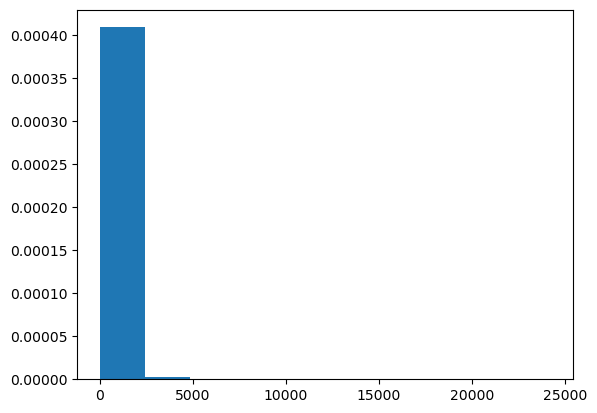

In [41]:
plt.hist(main_df["word_count"], density=True)
plt.show()